In [138]:
import pandas as pd
from vega_datasets import data
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
from datetime import datetime
import numpy as np
import prepare, acquire
import statsmodels.api as sm

In [7]:
stores_df = pd.read_csv('store_item_sales.csv')

In [8]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     913000 non-null  int64  
 1   item_id        913000 non-null  int64  
 2   sale_amount    913000 non-null  float64
 3   sale_date      913000 non-null  object 
 4   sale_id        913000 non-null  int64  
 5   store_id       913000 non-null  int64  
 6   item_brand     913000 non-null  object 
 7   item_name      913000 non-null  object 
 8   item_price     913000 non-null  float64
 9   item_upc12     913000 non-null  int64  
 10  item_upc14     913000 non-null  int64  
 11  store_address  913000 non-null  object 
 12  store_city     913000 non-null  object 
 13  store_state    913000 non-null  object 
 14  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 104.5+ MB


In [10]:
stores_df = prepare.prep_stores(stores_df)

In [12]:
stores_df= stores_df.drop(columns = 'Unnamed: 0')

In [31]:
stores_df[stores_df.index == '2015-12-30']

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,day,month,sales_total
sale_date,,,,,,,,,,,,,,,,
2015-12-30 00:00:00+00:00,14,43.0,254908,10,Pamprin,Pamprin Maximum Strength Multi-symptom Menstru...,7.54,41167300121,41167300121,8503 NW Military Hwy,San Antonio,TX,78231,Wednesday,12,324.22
2015-12-30 00:00:00+00:00,10,67.0,167260,2,Ahold,Ahold Cocoa Almonds,3.17,688267141676,688267141676,9255 FM 471 West,San Antonio,TX,78251,Wednesday,12,212.39
2015-12-30 00:00:00+00:00,28,70.0,499592,4,Usda Produce,Guava,7.52,719175900007,719175900007,516 S Flores St,San Antonio,TX,78204,Wednesday,12,526.40
2015-12-30 00:00:00+00:00,37,12.0,669410,7,Nakano,Nakano Seasoned Rice Vinegar Original,9.59,73575295003,73575295003,12018 Perrin Beitel Rd,San Antonio,TX,78217,Wednesday,12,115.08
2015-12-30 00:00:00+00:00,47,12.0,848358,5,Bear Naked,Bear Naked Fit Almond Crisp 100 Percent Natura...,7.38,884623708976,884623708976,1520 Austin Hwy,San Antonio,TX,78218,Wednesday,12,88.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-30 00:00:00+00:00,3,34.0,43092,4,Earths Best,Earths Best Organic Fruit Yogurt Smoothie Mixe...,2.43,23923330139,23923330139,516 S Flores St,San Antonio,TX,78204,Wednesday,12,82.62
2015-12-30 00:00:00+00:00,31,40.0,565328,10,Zhenas Gypsy Tea,Zhenas Gypsy Tea Herbal Red Tea Sachets Fire L...,4.21,652790100226,652790100226,8503 NW Military Hwy,San Antonio,TX,78231,Wednesday,12,168.40
2015-12-30 00:00:00+00:00,35,35.0,632890,7,Natures Way,Natures Way Forskohlii - 60 Ct,5.19,33674100066,33674100066,12018 Perrin Beitel Rd,San Antonio,TX,78217,Wednesday,12,181.65


In [36]:
store_total = pd.DataFrame(stores_df['sales_total'].resample('1D').sum())

In [37]:
store_total

,sales_total
sale_date,
2013-01-01 00:00:00+00:00,73844.01
2013-01-02 00:00:00+00:00,73570.58
2013-01-03 00:00:00+00:00,78169.48
2013-01-04 00:00:00+00:00,84467.73
2013-01-05 00:00:00+00:00,87621.85
...,...
2017-12-27 00:00:00+00:00,109151.15
2017-12-28 00:00:00+00:00,117377.49
2017-12-29 00:00:00+00:00,126541.84


Split your data for analysis. 

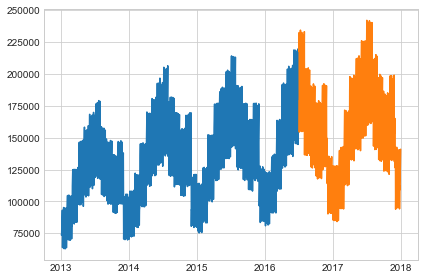

In [38]:
#Define the size of the train dataset
train_size = .70

#n = the number of obsrvations in the dataframe
n = store_total.shape[0]

#calculate the index for the start of the test split
test_start_index = round(train_size * n)

train = store_total[:test_start_index] # everything up (not including) to the test_start_index
test = store_total[test_start_index:] # everything from the test_start_index to the end

#Visulaize the two splits to ensure that each split captures a complete season, cycle, trend
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

In [86]:
y = train['sales_total']

<AxesSubplot:ylabel='Frequency'>

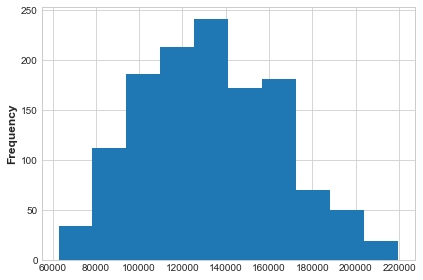

In [87]:
y.plot.hist()

<AxesSubplot:xlabel='sale_date'>

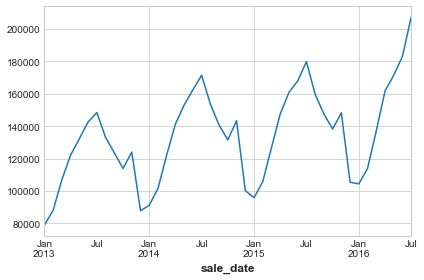

In [88]:
y.resample('1M').mean().plot()

<AxesSubplot:xlabel='sale_date'>

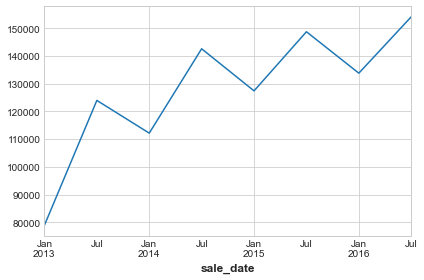

In [89]:
y.resample('6M').mean().plot()

<AxesSubplot:xlabel='sale_date'>

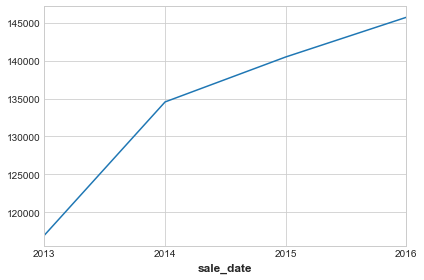

In [90]:
y.resample('1Y').mean().plot()

<AxesSubplot:xlabel='sale_date'>

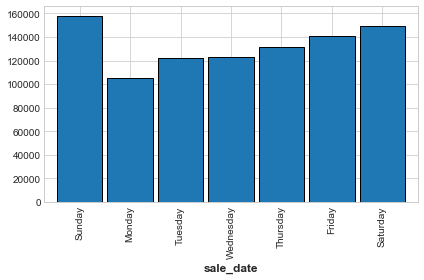

In [91]:
y.groupby(y.index.day_name()).mean().reindex(['Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']).plot.bar(width=.9, ec='black')

In [92]:
y.index.day_name()

Index(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       ...
       'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
      dtype='object', name='sale_date', length=1278)

In [93]:
y.groupby(y.index.day_name()).mean().reindex(['Sunday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

sale_date
Sunday       158080.867253
Monday       105342.670220
Tuesday      122593.183443
Wednesday    122800.265027
Thursday     131498.595137
Friday       140528.306448
Saturday     149036.955495
Name: sales_total, dtype: float64

<AxesSubplot:xlabel='month', ylabel='sales_total'>

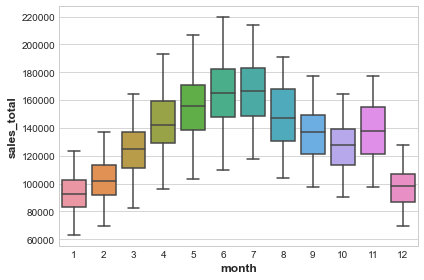

In [97]:
y.reset_index().assign(month = lambda df: df.sale_date.dt.month).pipe((sns.boxplot, 'data'), y = 'sales_total', x = 'month')

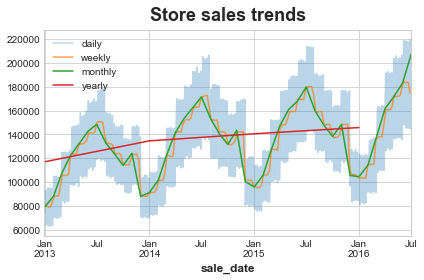

In [98]:
y.resample('1D').mean().plot(alpha=.3, label='daily')
y.resample('1W').mean().plot(alpha=.7, label='weekly')
y.resample('1M').mean().plot(label='monthly')
y.resample('1Y').mean().plot(label='yearly')
plt.legend()
plt.title('Store sales trends')
plt.show()

<AxesSubplot:title={'center':'Average week-to-week change in sales'}, xlabel='sale_date'>

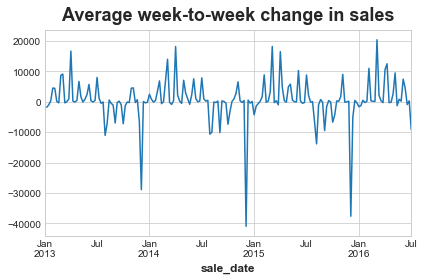

In [99]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in sales')

<AxesSubplot:title={'center':'Average month-to-month change in sales'}, xlabel='sale_date'>

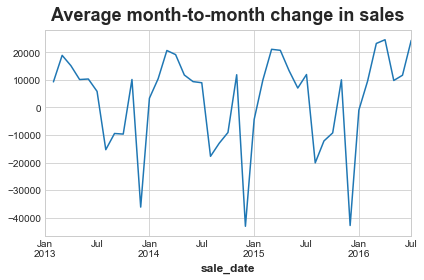

In [100]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in sales')

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

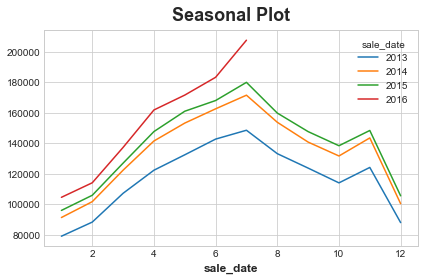

In [101]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

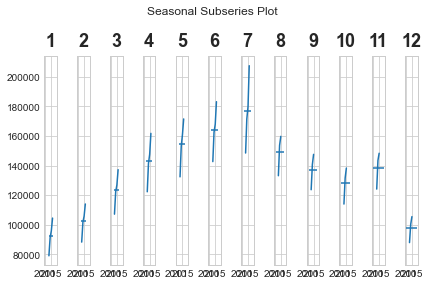

In [106]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()
fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')
fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

Text(0.5, 1.0, 'Lag plot with lag=7')

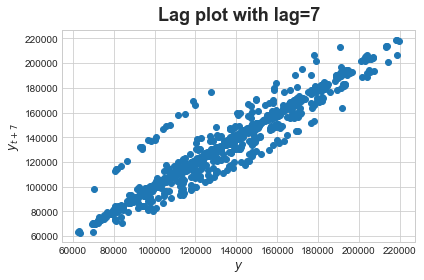

In [145]:
plt.scatter(y, y.shift(7))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 7}$')
plt.title('Lag plot with lag=7')

<AxesSubplot:xlabel='sales_total', ylabel='nxt_week'>

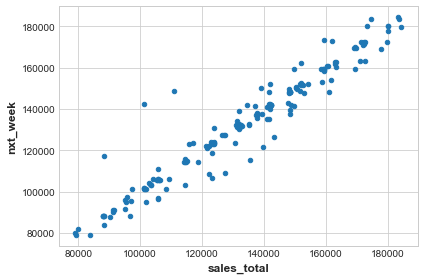

In [128]:
weekly = pd.DataFrame(y.resample('1W').mean())
weekly['nxt_week'] = weekly.sales_total.shift(1)
weekly.plot.scatter(x = 'sales_total', y = 'nxt_week')

<AxesSubplot:xlabel='sales_total', ylabel='nxt_month'>

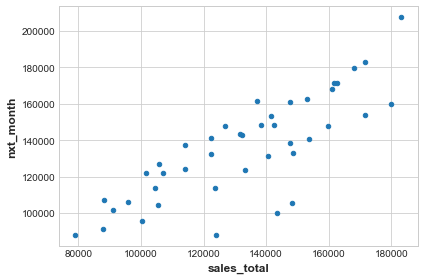

In [129]:
monthly = pd.DataFrame(y.resample('1M').mean())
monthly['nxt_month'] = monthly.sales_total.shift(-1)
monthly.plot.scatter(x = 'sales_total', y = 'nxt_month') 

<AxesSubplot:xlabel='sales_total', ylabel='nxt_6'>

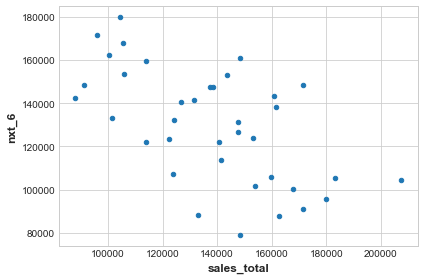

In [133]:
half = pd.DataFrame(y.resample('1M').mean())
half['nxt_6'] = half.sales_total.shift(6)
half.plot.scatter(x = 'sales_total', y = 'nxt_6')

<AxesSubplot:xlabel='sales_total', ylabel='next_6'>

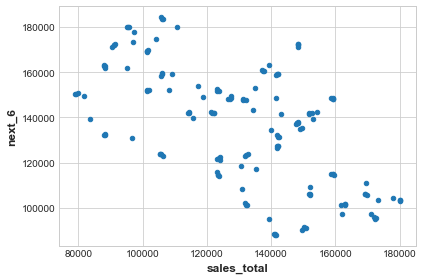

In [136]:
weekly = pd.DataFrame(y.resample('1W').mean())
weekly['next_6'] = weekly.sales_total.shift(-26)
weekly.plot.scatter(x = 'sales_total', y = 'next_6')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

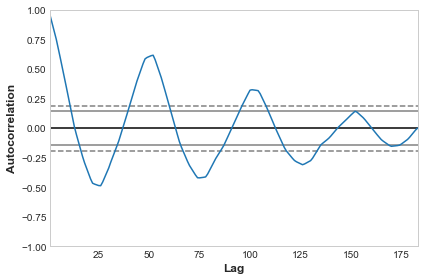

In [137]:
pd.plotting.autocorrelation_plot(train.sales_total.resample('W').mean())

In [142]:
week = y.resample('W').mean()
result = sm.tsa.seasonal_decompose(week)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,81794.583333,NaN,-38901.876390,NaN
2013-01-13 00:00:00+00:00,79990.601429,NaN,-38210.382887,NaN
2013-01-20 00:00:00+00:00,78973.360000,NaN,-38830.973862,NaN
2013-01-27 00:00:00+00:00,79272.691429,NaN,-38827.078436,NaN
2013-02-03 00:00:00+00:00,83792.507143,NaN,-36538.820195,NaN


<AxesSubplot:xlabel='sale_date'>

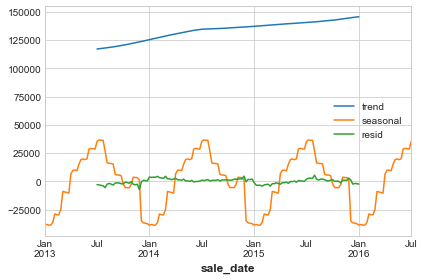

In [151]:
decomposition.iloc[:, 1:].plot()

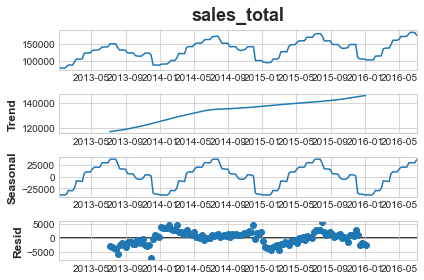

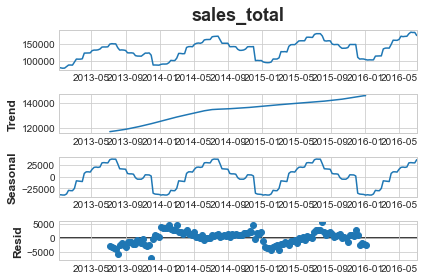

In [153]:
result.plot()

In [155]:
train = train.resample('D').mean()
# create a categorical feature
train['sale_bin'] = pd.qcut(train.sales_total, 4, labels=['very_low', 'low', 'high', 'very_high'])
train.groupby('sale_bin').mean()

,sales_total
sale_bin,
very_low,92855.313156
low,120532.399875
high,143095.713981
very_high,174827.078906


Text(0, 0.5, '% of days in the month')

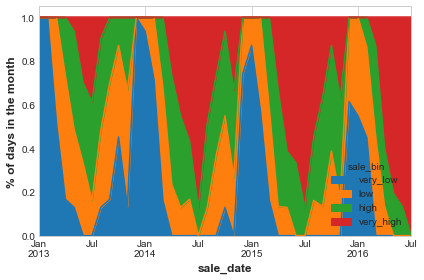

In [156]:
(train.groupby('sale_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')

Text(0, 0.5, '% of days in the month')

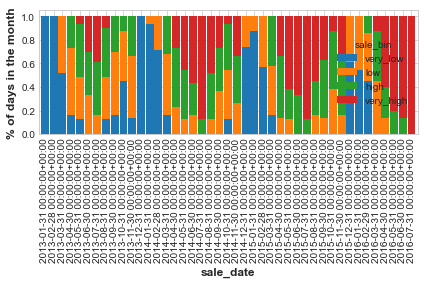

In [158]:
(train.groupby('sale_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.bar(stacked = True, width = .9)
)
plt.ylabel('% of days in the month')

Now for OPS data

In [159]:
power = pd.read_csv('power.csv')

In [161]:
power = prepare.prep_power(power)

In [162]:
power

,Consumption,Wind,Solar,Wind+Solar,day,month
Date,,,,,,
2006-01-01,1069.18400,0.000,0.000,0.000,Sunday,1
2006-01-02,1380.52100,0.000,0.000,0.000,Monday,1
2006-01-03,1442.53300,0.000,0.000,0.000,Tuesday,1
2006-01-04,1457.21700,0.000,0.000,0.000,Wednesday,1
2006-01-05,1477.13100,0.000,0.000,0.000,Thursday,1
...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,Wednesday,12
2017-12-28,1299.86398,506.424,14.162,520.586,Thursday,12
2017-12-29,1295.08753,584.277,29.854,614.131,Friday,12


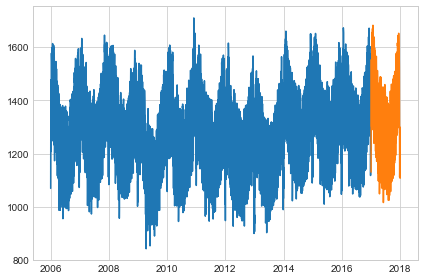

In [182]:
train = power[:'2016'] # includes 2017
test = power['2017']

plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)

In [165]:
train

,Consumption,Wind,Solar,Wind+Solar,day,month
Date,,,,,,
2006-01-01,1069.184,0.000,0.000,0.000,Sunday,1
2006-01-02,1380.521,0.000,0.000,0.000,Monday,1
2006-01-03,1442.533,0.000,0.000,0.000,Tuesday,1
2006-01-04,1457.217,0.000,0.000,0.000,Wednesday,1
2006-01-05,1477.131,0.000,0.000,0.000,Thursday,1
...,...,...,...,...,...,...
2014-05-22,1459.234,112.809,185.338,298.147,Thursday,5
2014-05-23,1429.832,56.471,119.220,175.691,Friday,5
2014-05-24,1199.258,32.656,140.007,172.663,Saturday,5


<AxesSubplot:xlabel='Date'>

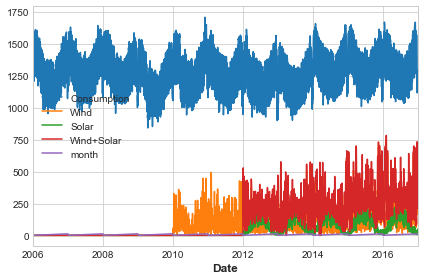

In [183]:
train.plot()

array([[<AxesSubplot:title={'center':'Consumption'}>,
        <AxesSubplot:title={'center':'Wind'}>],
       [<AxesSubplot:title={'center':'Solar'}>,
        <AxesSubplot:title={'center':'Wind+Solar'}>],
       [<AxesSubplot:title={'center':'month'}>, <AxesSubplot:>]],
      dtype=object)

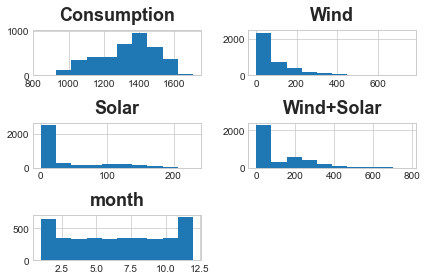

In [184]:
train.hist()

In [185]:
y = train['Consumption']

<AxesSubplot:xlabel='Date'>

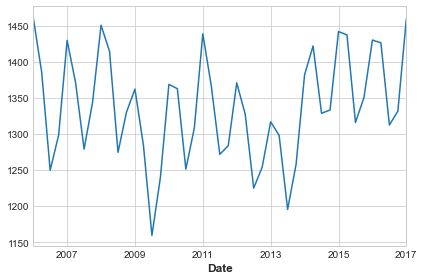

In [186]:
y.resample('3M').mean().plot()

<AxesSubplot:xlabel='Date'>

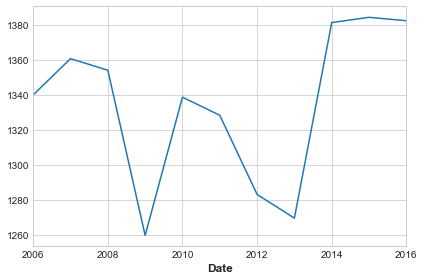

In [187]:
y.resample('1Y').mean().plot()

<AxesSubplot:xlabel='month', ylabel='Consumption'>

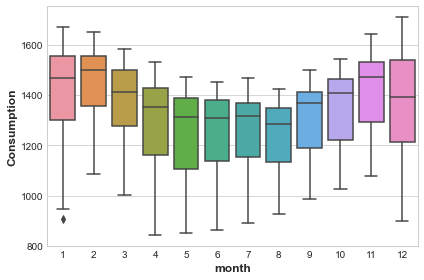

In [188]:
y.reset_index().assign(month = lambda df: df.Date.dt.month).pipe((sns.boxplot, 'data'), y = 'Consumption', x = 'month')

<AxesSubplot:xlabel='month', ylabel='Wind'>

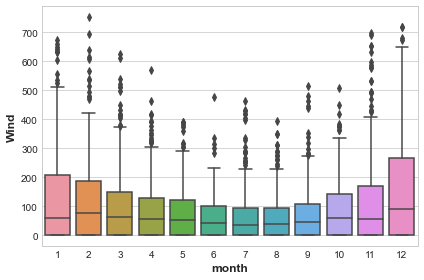

In [189]:
train['Wind'].reset_index().assign(month = lambda df: df.Date.dt.month).pipe((sns.boxplot, 'data'), y = 'Wind', x = 'month')

<AxesSubplot:xlabel='month', ylabel='Solar'>

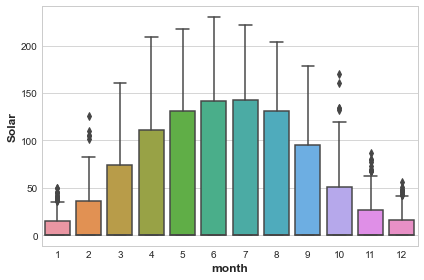

In [190]:
train['Solar'].reset_index().assign(month = lambda df: df.Date.dt.month).pipe((sns.boxplot, 'data'), y = 'Solar', x = 'month')

<AxesSubplot:xlabel='month', ylabel='Wind+Solar'>

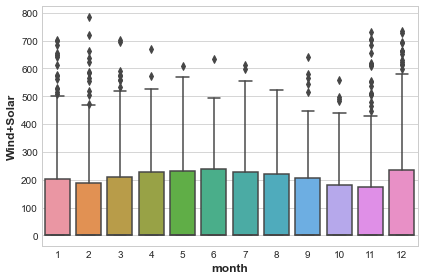

In [191]:
train['Wind+Solar'].reset_index().assign(month = lambda df: df.Date.dt.month).pipe((sns.boxplot, 'data'), y = 'Wind+Solar', x = 'month')

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='Date'>

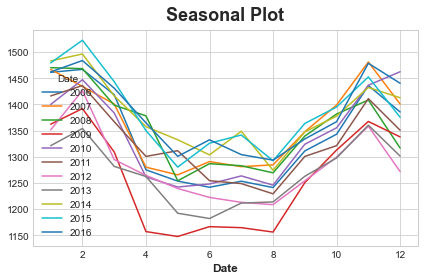

In [192]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

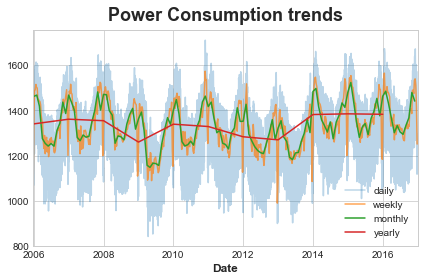

In [193]:
y.resample('1D').mean().plot(alpha=.3, label='daily')
y.resample('1W').mean().plot(alpha=.7, label='weekly')
y.resample('1M').mean().plot(label='monthly')
y.resample('1Y').mean().plot(label='yearly')
plt.legend()
plt.title('Power Consumption trends')
plt.show()

In [194]:
week = y.resample('W').mean()
result = sm.tsa.seasonal_decompose(week)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
Date,,,,
2006-01-01,1069.184000,NaN,-33.536583,NaN
2006-01-08,1381.300143,NaN,-151.128130,NaN
2006-01-15,1486.730286,NaN,-23.125938,NaN
2006-01-22,1490.031143,NaN,97.415793,NaN
2006-01-29,1514.176857,NaN,125.755815,NaN


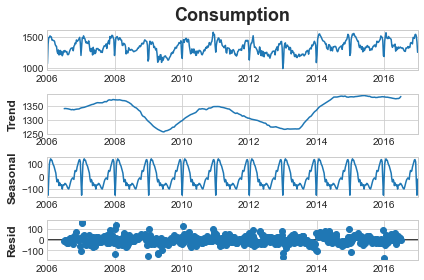

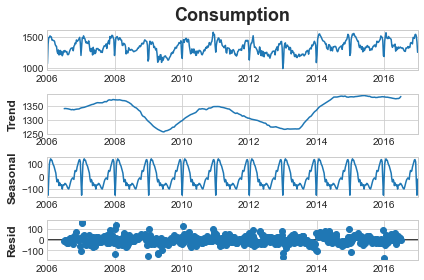

In [196]:
result.plot()

<AxesSubplot:xlabel='Date'>

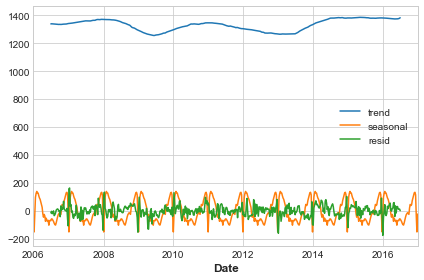

In [197]:
decomposition.iloc[:, 1:].plot()